In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (
    SelectKBest, 
    mutual_info_classif, 
    f_regression
)

import xgboost as xgb

import warnings

warnings.filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv('diabetes.rwrite1.csv', sep = '\s+')
diabetes.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [3]:
X = diabetes[['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]
y = diabetes['y']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

def shape_training_test(X_train, X_test, y_train, y_test):
    return print(f"""

                Your Training and Test were divided as:
                    1. X_train: {X_train.shape} 
                    2. y_train: {y_train.shape}
                 
                    3. X_test: {X_test.shape}
                    4. y_test: {y_test.shape}

            """)

shape_training_test(X_train, X_test, y_train, y_test)



                Your Training and Test were divided as:
                    1. X_train: (353, 10) 
                    2. y_train: (353,)
                 
                    3. X_test: (89, 10)
                    4. y_test: (89,)

            


In [62]:
pipe = Pipeline([
          ('pca', PCA())
        , ('XGBoostRegressor', xgb.XGBRegressor(eta=.65))   
])

In [63]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA()),
                ('XGBoostRegressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eta=0.65,
                              eval_metric=None, feature_types=None, gamma=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [64]:
y_pred = pipe.predict(X_test)
print(f"""
    THE PREDICTED VALUES ARE:
      
    {y_pred}

""")


    THE PREDICTED VALUES ARE:
      
    [185.62276  164.34425  166.05411  287.33334  139.7227   119.91189
 263.56125  203.68848  105.41534   92.30505   57.83917  212.79747
  55.73504  163.0207   119.40463  128.38245  277.11032  321.28622
 184.0003   291.92078  215.74786   45.683113 129.9765   205.92207
  98.719894 123.64656  209.98064  125.684494 121.96606  140.18118
 108.46488  169.17297   96.50715  177.99446  140.73541  214.80252
  86.53461  135.07805  129.93      50.10051  127.05358   66.40559
 155.7506   213.31206  157.49442   57.385494 137.11877  109.700714
  63.491783 188.48344  184.30206  104.98935  160.32793  103.52284
 205.47446  173.60286   63.587315 223.69604   83.4376    72.33351
 159.20256  156.18501  130.03506  100.11591  146.89008  189.11905
 135.67549  207.81415  176.74481  153.86003  179.48344  233.99568
 208.23013  155.66176  132.6157   146.22102  215.67273  152.7792
 127.586296 168.0339   133.036    196.30916   83.65958  124.00036
 113.19896   57.197754 148.75333  

# Avaliando o Modelo

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"""
    MÉTRICAS DE AVALIAÇÃO:
      
      MAE : {mae:.4f},
      MSE : {mse:.4f},
      RMSE : {rmse:.4f},
      r2 : {r2:.4f}

""")


    MÉTRICAS DE AVALIAÇÃO:
      
      MAE : 45.5034,
      MSE : 2929.3491,
      RMSE : 54.1235,
      r2 : 0.4471




In [66]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def ploting_real_vs_predicted(y_test, y_pred):
    _ = plt.scatter(y_test, y_pred, alpha=.5, label="Values")
    _ = plt.plot([min(y_test), max(y_test)] , [min(y_test), max(y_test)], 
                linewidth = 0.25, color = 'blue', label="Regressor")
    _ = plt.xlabel("y")
    _ = plt.ylabel("Valores Previstos")
    _ = plt.title("Real vs Previsto")
    plt.show()

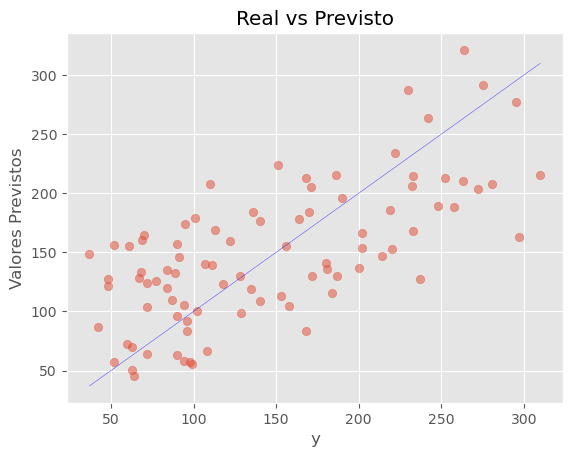

In [67]:
ploting_real_vs_predicted(y_test, y_pred)